In [1]:
# Task 1: Data Preparation

In [2]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Use the raw string notation to load the CSV data (Change the location path in your devices)
file_path = r"C:\Users\linhd\Downloads\A1data.csv" 

# Load the dataset using the correct file path
df = pd.read_csv(file_path)

# Display the data to confirm it loaded correctly
df

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Residence (Rural),Residence (Urban),Wealth quintile (Poorest),Wealth quintile (Richest),Time period
0,DZA,Algeria,MENA,MENA,Upper middle income (UM),25%,10%,33%,1%,78%,2018-2019
1,AGO,Angola,SSA,ESA,Lower middle income (LM),19%,2%,27%,0%,62%,2015-2016
2,ARG,Argentina,LAC,LAC,Upper middle income (UM),43%,NaN,NaN,NaN,NaN,2011-2012
3,ARM,Armenia,ECA,EECA,Upper middle income (UM),81%,71%,89%,44%,99%,2015-2016
4,BGD,Bangladesh,SA,SA,Lower middle income (LM),34%,31%,48%,8%,73%,2019
...,...,...,...,...,...,...,...,...,...,...,...
85,URY,Uruguay,LAC,LAC,High income (H),66%,46%,68%,28%,66%,2012-2099
86,UZB,Uzbekistan,ECA,EECA,Lower middle income (LM),18%,14%,31%,1%,70%,2017
87,VNM,Viet Nam,EAP,EAP,Lower middle income (LMM),45%,17%,62%,11%,82%,2012
88,ZMB,Zambia,SSA,ESA,Lower middle income (LM),8%,2%,16%,0%,31%,2018-2019


In [4]:
# Issue 1: Handling the Missing values
# Since the first 4 columns are presumed to have no errors, focus on the other columns.
missing_values = df.isnull().sum()
print(missing_values)

ISO3                         0
Countries and areas          0
Region                       0
Sub-region                   0
Income Group                 0
Total                        0
Residence (Rural)            5
Residence (Urban)            4
Wealth quintile (Poorest)    7
Wealth quintile (Richest)    7
Time period                  0
dtype: int64


In [5]:
# Drop rows where any of the key columns have missing values
df = df.dropna(subset=['Residence (Rural)', 'Residence (Urban)', 'Wealth quintile (Poorest)', 'Wealth quintile (Richest)'])

df.isna().sum()

ISO3                         0
Countries and areas          0
Region                       0
Sub-region                   0
Income Group                 0
Total                        0
Residence (Rural)            0
Residence (Urban)            0
Wealth quintile (Poorest)    0
Wealth quintile (Richest)    0
Time period                  0
dtype: int64

In [6]:
# Issue 2: Handling the Duplicate values

In [7]:
# Check number of rows before fixed
df.shape[0]

83

In [8]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
df = df.drop_duplicates()

print("Duplicates removed.")

# Check number of rows after fixed
df.shape[0]

Number of duplicate rows: 3
Duplicates removed.


80

In [9]:
# Issue 3: Handling the Outliers in the 'Residence (Rural)', 'Residence (Urban)', 'Wealth quintile (Poorest)', 'Wealth quintile (Richest)' columns
# For example, the outlier in the Wealth quintile (Richest) column has a maximum value of 110%, which is unusual for a percentage and likely an error

In [10]:
# Clean percentage columns
percentage_columns = ['Total', 'Residence (Rural)', 'Residence (Urban)', 'Wealth quintile (Poorest)', 'Wealth quintile (Richest)']

for col in percentage_columns:
    df.loc[:, col] = df[col].str.replace('%', '').str.strip() 
    df.loc[:, col] = pd.to_numeric(df[col], errors='coerce')    

In [11]:
# Display the errors
if df['Residence (Rural)'].max() <= 100:
    print("All values in the 'Residence (Rural)' column are within the expected range (<= 100%).")
else:
    print("Outliers detected and corrected in the 'Residence (Rural)' column.")

if df['Residence (Urban)'].max() <= 100:
    print("All values in the 'Residence (Urban)' column are within the expected range (<= 100%).")
else:
    print("Outliers detected and corrected in the 'Residence (Urban)' column.")

if df['Wealth quintile (Poorest)'].max() <= 100:
    print("All values in the 'Wealth quintile (Poorest)' column are within the expected range (<= 100%).")
else:
    print("Outliers detected and corrected in the 'Wealth quintile (Poorest)' column.")

if df['Wealth quintile (Richest)'].max() <= 100:
    print("All values in the 'Wealth quintile (Richest)' column are within the expected range (<= 100%).")
else:
    print("Outliers detected in the 'Wealth quintile (Richest)' column.")

All values in the 'Residence (Rural)' column are within the expected range (<= 100%).
All values in the 'Residence (Urban)' column are within the expected range (<= 100%).
All values in the 'Wealth quintile (Poorest)' column are within the expected range (<= 100%).
Outliers detected in the 'Wealth quintile (Richest)' column.


In [12]:
# Correct outliers above 100%
df['Residence (Rural)'] = df['Residence (Rural)'].apply(lambda x: min(x, 100) if x <= 100 else x)
df['Residence (Urban)'] = df['Residence (Urban)'].apply(lambda x: min(x, 100) if x <= 100 else x)
df['Wealth quintile (Poorest)'] = df['Wealth quintile (Poorest)'].apply(lambda x: min(x, 100) if x <= 100 else x)
df['Wealth quintile (Richest)'] = df['Wealth quintile (Richest)'].apply(lambda x: min(x, 100) if x <= 100 else x)

# Check for any values in those columns below 100% after cleaning
filtered_residence_rural = df[df['Residence (Rural)'] < 100]
filtered_residence_urban = df[df['Residence (Urban)'] < 100]
filtered_poorest = df[df['Wealth quintile (Poorest)'] < 100]
filtered_richest = df[df['Wealth quintile (Richest)'] < 100]

In [13]:
# Display confirmation that the columns have been fixed
if filtered_residence_rural.empty:
    print("All values in the 'Residence (Rural)' column are within the expected range (0% to 100%).")
else:
    print("Outliers detected and corrected in the 'Residence (Rural)' column.")

if filtered_residence_urban.empty:
    print("All values in the 'Residence (Urban)' column are within the expected range (0% to 100%).")
else:
    print("Outliers detected and corrected in the 'Residence (Urban)' column.")

if filtered_poorest.empty:
    print("All values in the 'Wealth quintile (Poorest)' column are within the expected range (0% to 100%).")
else:
    print("Outliers detected and corrected in the 'Wealth quintile (Poorest)' column.")

if filtered_richest.empty:
    print("All values in the 'Wealth quintile (Richest)' column are within the expected range (0% to 100%).")
else:
    print("Outliers detected and corrected in the 'Wealth quintile (Richest)' column.")

Outliers detected and corrected in the 'Residence (Rural)' column.
Outliers detected and corrected in the 'Residence (Urban)' column.
Outliers detected and corrected in the 'Wealth quintile (Poorest)' column.
Outliers detected and corrected in the 'Wealth quintile (Richest)' column.


In [14]:
# Issue 4: Handling the Incorrect data entries in Time period column

In [15]:
# There are some error data entries such as 3562, 2099, etc.
df['Time period'].unique()

array(['2018-2019', '2015-2016', '2019', '2012', '2017-2018', '2016',
       '2011-2012', '2018', '2013', '2010', '2014', '2017', '2014-2015',
       '2016-2017', '2015', '2076', '3562', '2011', '2012-2099'],
      dtype=object)

In [16]:
# Function to clean 'Time period' entries
def clean_time_period(df):
    df.loc[:, 'Time period'] = df['Time period'].str.split('-').apply(
        lambda x: '-'.join([y if int(y) <= 2024 else '2024' for y in x])
    )
    return df

# Apply the function to clean the 'Time period' column
df = clean_time_period(df)

# Check unique values in the 'Time period' column to confirm the cleaning
unique_time_periods = df['Time period'].unique()
print("Unique 'Time period' values after cleaning:", unique_time_periods)

Unique 'Time period' values after cleaning: ['2018-2019' '2015-2016' '2019' '2012' '2017-2018' '2016' '2011-2012'
 '2018' '2013' '2010' '2014' '2017' '2014-2015' '2016-2017' '2015' '2024'
 '2011' '2012-2024']


In [17]:
# Save the cleaned data
cleaned_file_path = "s3927777-cleaned-A1data.csv"
df.to_csv(cleaned_file_path, index=False)

In [18]:
# Task 2: Data Exploration

In [19]:
# load the cleaned data
df

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Residence (Rural),Residence (Urban),Wealth quintile (Poorest),Wealth quintile (Richest),Time period
0,DZA,Algeria,MENA,MENA,Upper middle income (UM),25,10,33,1,78,2018-2019
1,AGO,Angola,SSA,ESA,Lower middle income (LM),19,2,27,0,62,2015-2016
3,ARM,Armenia,ECA,EECA,Upper middle income (UM),81,71,89,44,99,2015-2016
4,BGD,Bangladesh,SA,SA,Lower middle income (LM),34,31,48,8,73,2019
5,BRB,Barbados,LAC,LAC,High income (H),68,66,69,20,100,2012
...,...,...,...,...,...,...,...,...,...,...,...
85,URY,Uruguay,LAC,LAC,High income (H),66,46,68,28,66,2012-2024
86,UZB,Uzbekistan,ECA,EECA,Lower middle income (LM),18,14,31,1,70,2017
87,VNM,Viet Nam,EAP,EAP,Lower middle income (LMM),45,17,62,11,82,2012
88,ZMB,Zambia,SSA,ESA,Lower middle income (LM),8,2,16,0,31,2018-2019


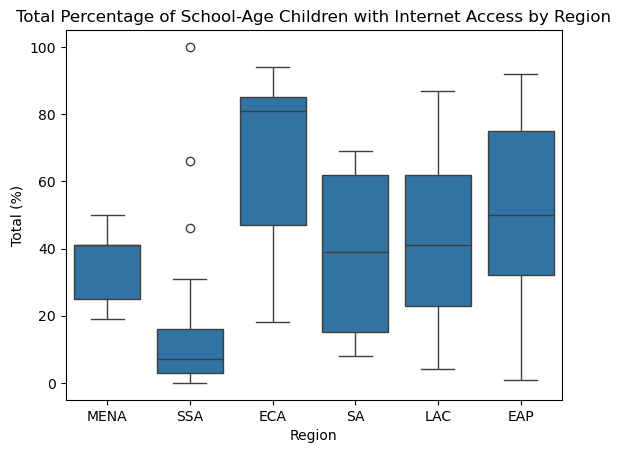

In [20]:
# Task 2.1

# Side-by-side boxplot with the separated data by Region
sns.boxplot(x = 'Region', y = 'Total', data = df)
plt.title('Total Percentage of School-Age Children with Internet Access by Region')
plt.xlabel('Region')
plt.ylabel('Total (%)')
plt.show()

In [21]:
# Calculate the median for each Region
median_by_region = df.groupby('Region')[['Total']].median()
median_by_region

,Total
Region,
EAP,50.0
ECA,81.0
LAC,41.0
MENA,41.0
SA,39.0
SSA,7.0


In [22]:
# Task 2.2

# Calculate the mean for Wealth quintiles
mean_poorest = df['Wealth quintile (Poorest)'].mean()
mean_richest = df['Wealth quintile (Richest)'].mean()

# Display the mean values with decoration
print("Mean for Wealth quintiles:")
print(f"Mean for Wealth quintile (Poorest): {mean_poorest}")
print(f"Mean for Wealth quintile (Richest): {mean_richest}")

Mean for Wealth quintiles:
Mean for Wealth quintile (Poorest): 18.5875
Mean for Wealth quintile (Richest): 61.975


In [23]:
# Top 10 countries with the highest percentages for Wealth quintile (Poorest)
top_10_poorest = df[['Countries and areas', 'Wealth quintile (Poorest)']].sort_values(by='Wealth quintile (Poorest)', ascending=False).head(10)
print("\n\033[1mTop 10 countries for Wealth quintile (Poorest):\033[0m")
top_10_poorest


Top 10 countries for Wealth quintile (Poorest):


,Countries and areas,Wealth quintile (Poorest)
65,Somalia,100
59,Russian Federation,88
9,Brazil,84
77,Tonga,83
15,Chile,75
68,Sri Lanka,71
73,North Macedonia,68
63,Serbia,65
36,Japan,64
40,Kyrgyzstan,56


In [24]:
# Top 10 countries with the highest percentages for Wealth quintile (Richest)
top_10_richest = df[['Countries and areas', 'Wealth quintile (Richest)']].sort_values(by='Wealth quintile (Richest)', ascending=False).head(10)
print("\n\033[1mTop 10 countries for Wealth quintile (Richest):\033[0m")
top_10_richest


Top 10 countries for Wealth quintile (Richest):


,Countries and areas,Wealth quintile (Richest)
59,Russian Federation,110
63,Serbia,100
5,Barbados,100
65,Somalia,100
10,Bulgaria,100
73,North Macedonia,100
18,Costa Rica,99
15,Chile,99
3,Armenia,99
68,Sri Lanka,99


In [25]:
# Task 2.3

# Filter the data for Lower middle income (LM) group
lm_data = df[df['Income Group'] == 'Lower middle income (LM)']

lm_data

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Residence (Rural),Residence (Urban),Wealth quintile (Poorest),Wealth quintile (Richest),Time period
1,AGO,Angola,SSA,ESA,Lower middle income (LM),19,2,27,0,62,2015-2016
4,BGD,Bangladesh,SA,SA,Lower middle income (LM),34,31,48,8,73,2019
7,BOL,Bolivia (Plurinational State of),LAC,LAC,Lower middle income (LM),12,3,17,1,56,2016
12,CMR,Cameroon,SSA,WCA,Lower middle income (LM),5,0,10,0,23,2014
22,DJI,Djibouti,SSA,ESA,Lower middle income (LM),7,2,11,2,36,2012
28,GHA,Ghana,SSA,WCA,Lower middle income (LM),16,10,25,3,49,2017-2018
33,IND,India,SA,SA,Lower middle income (LM),8,5,16,0,35,2015-2016
34,IDN,Indonesia,EAP,EAP,Lower middle income (LM),20,11,28,7,47,2019
38,KEN,Kenya,SSA,ESA,Lower middle income (LM),100,1,14,3,20,2013
39,KIR,Kiribati,EAP,EAP,Lower middle income (LM),50,34,68,14,89,2018-2019


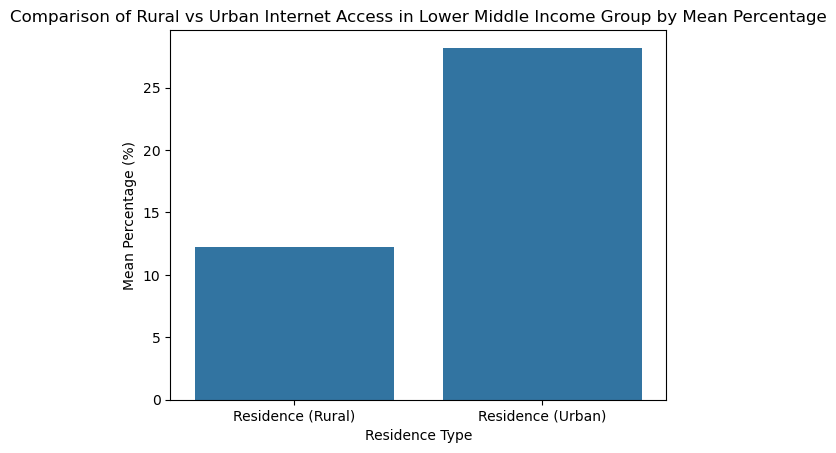

In [26]:
# Calculate statistics for Residence (Rural vs Urban)

# 2.3.1. Compare Mean percentage
lm_mean = lm_data[['Residence (Rural)', 'Residence (Urban)']].mean()

# Convert series to a DataFrame
lm_mean_value = lm_mean.reset_index()
lm_mean_value.columns = ['Residence Type', 'Percentage']

# Visualize the comparison
sns.barplot(x='Residence Type', y='Percentage', data=lm_mean_value)
plt.title('Comparison of Rural vs Urban Internet Access in Lower Middle Income Group by Mean Percentage')
plt.ylabel('Mean Percentage (%)')
plt.show()

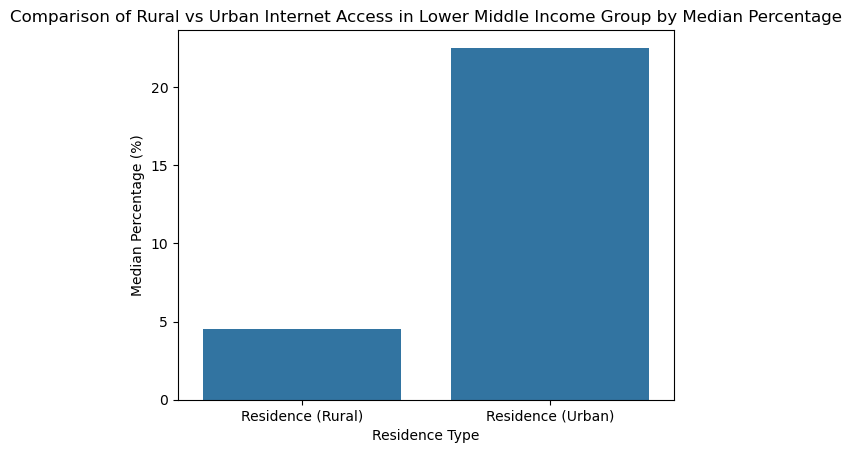

In [27]:
# 2.3.2. Compare Median percentage
lm_median = lm_data[['Residence (Rural)', 'Residence (Urban)']].median()

# Convert series to a DataFrame
lm_median_value = lm_median.reset_index()
lm_median_value.columns = ['Residence Type', 'Percentage']

# Visualize the comparison
sns.barplot(x='Residence Type', y='Percentage', data=lm_median_value)
plt.title('Comparison of Rural vs Urban Internet Access in Lower Middle Income Group by Median Percentage')
plt.ylabel('Median Percentage (%)')
plt.show()

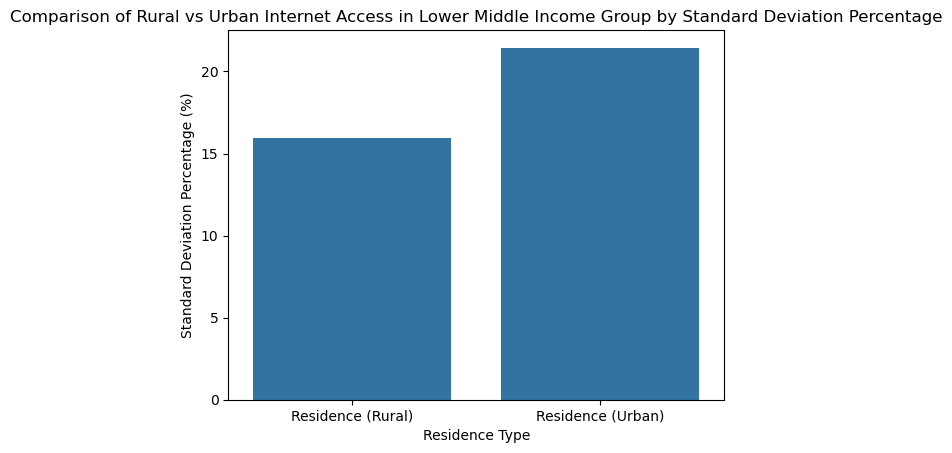

In [28]:
# 2.3.3. Compare Standard Deviation percentage
lm_std = lm_data[['Residence (Rural)', 'Residence (Urban)']].std()

# Convert series to a DataFrame
lm_std_value = lm_std.reset_index()
lm_std_value.columns = ['Residence Type', 'Percentage']

# Visualize the comparison
sns.barplot(x='Residence Type', y='Percentage', data=lm_std_value)
plt.title('Comparison of Rural vs Urban Internet Access in Lower Middle Income Group by Standard Deviation Percentage')
plt.ylabel('Standard Deviation Percentage (%)')
plt.show()